# Stock Price Prediction Model - Tanmay Srivastava

#### In this notebook, prices of stocks are predicted using LSTM model.

In [1]:
# Importing Dependencies

import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

## Stock information:

In [2]:
print("Enter Stock Name: ")
C_name = input()

Enter Stock Name: 
AAPL


In [3]:
print("Enter Today's Date: ")
enddate = input()

Enter Today's Date: 
2021-11-01


## Extracting data

In [4]:
df = web.DataReader(C_name, data_source = 'yahoo', start = '2015-01-01', end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.020115
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782116
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083960
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086229
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423965
...,...,...,...,...,...,...
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.320007
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.850006
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.570007


In [5]:
df.shape

(1722, 6)

## Plotting graph

c:\users\tanmay\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


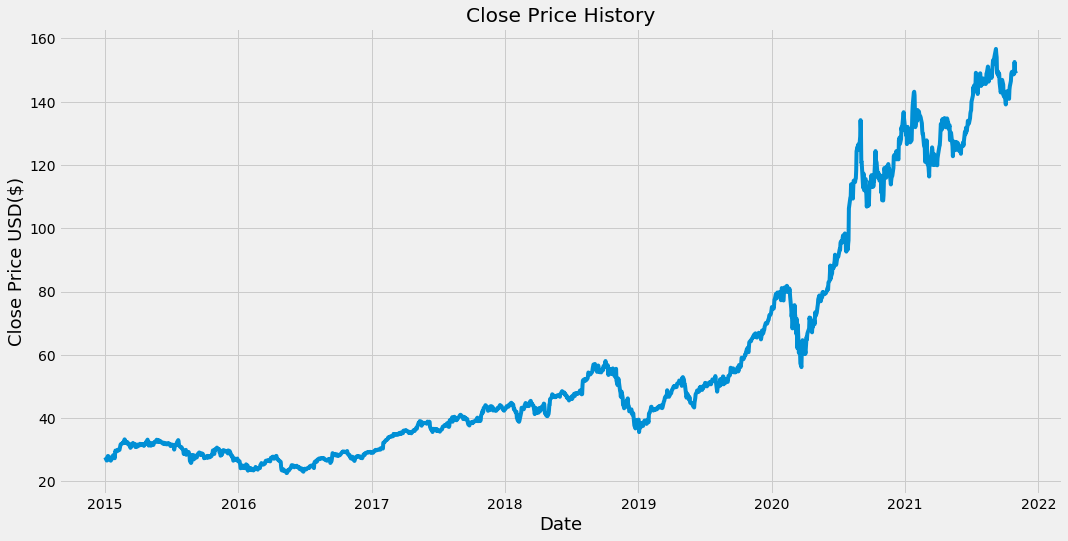

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [7]:
# Dataframe with only close column
data = df.filter(['Close'])

# Converting into numpy
dataset = data.values

# Rows to train the model 80%
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1378

In [8]:
# Scaling the data(0-1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03735879],
       [0.03540137],
       [0.0296596 ],
       ...,
       [0.96927784],
       [0.94862235],
       [0.94235863]])

## Getting training data

In [9]:
# Creating scaled dataset

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if(i<=60):
        print(x_train)
        print(y_train)                        # y is the value we want our model to predict 61

[array([0.03735879, 0.03540137, 0.0296596 , 0.02967825, 0.03245592,
       0.04017375, 0.04039746, 0.03525223, 0.03706052, 0.03627756,
       0.0307222 , 0.0291749 , 0.0342642 , 0.0358115 , 0.0411245 ,
       0.04220575, 0.04242944, 0.03504717, 0.04654935, 0.05324187,
       0.04999815, 0.05273853, 0.05277582, 0.05447224, 0.05518065,
       0.0532978 , 0.05477052, 0.0590582 , 0.06438984, 0.0673353 ,
       0.06849112, 0.06988927, 0.07154842, 0.07104508, 0.0730025 ,
       0.07952724, 0.07797994, 0.0716789 , 0.07471757, 0.07106374,
       0.07223817, 0.07274151, 0.07121285, 0.0672421 , 0.06759629,
       0.06860296, 0.06370009, 0.05946833, 0.06358823, 0.06198501,
       0.06452034, 0.06841655, 0.07108237, 0.06927408, 0.06629135,
       0.06873346, 0.06776408, 0.06159353, 0.06319675, 0.06135119])]
[0.06716752825544103]


In [10]:
# x_train and y_train into numpy

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Data shape

x_train.shape

(1318, 60)

In [12]:
# Reshaping the data since LSTM accepts 3D data so,

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1318, 60, 1)

## Building model

In [13]:
# Building LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model

model.compile(optimizer= 'adam', loss='mean_squared_error')

## Training model

In [15]:
# Training the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1318/1318 [==============================] - 90s 63ms/step - loss: 5.0912e-04


## Getting testing data

In [16]:
# Create the testing dataset
# Creating a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len-60:, :]

# Create the dataset of x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
# Convert data into numpy array

x_test = np.array(x_test)

In [18]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Predicting model

In [19]:
# Get the model price prediction values
predictions = model.predict(x_test)

# Back into normal form
predictions = scaler.inverse_transform(predictions)

## Calculating error

In [20]:
# Getting the root mean squared error

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.451549612603898

## Plotting predicted graph

c:\users\tanmay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


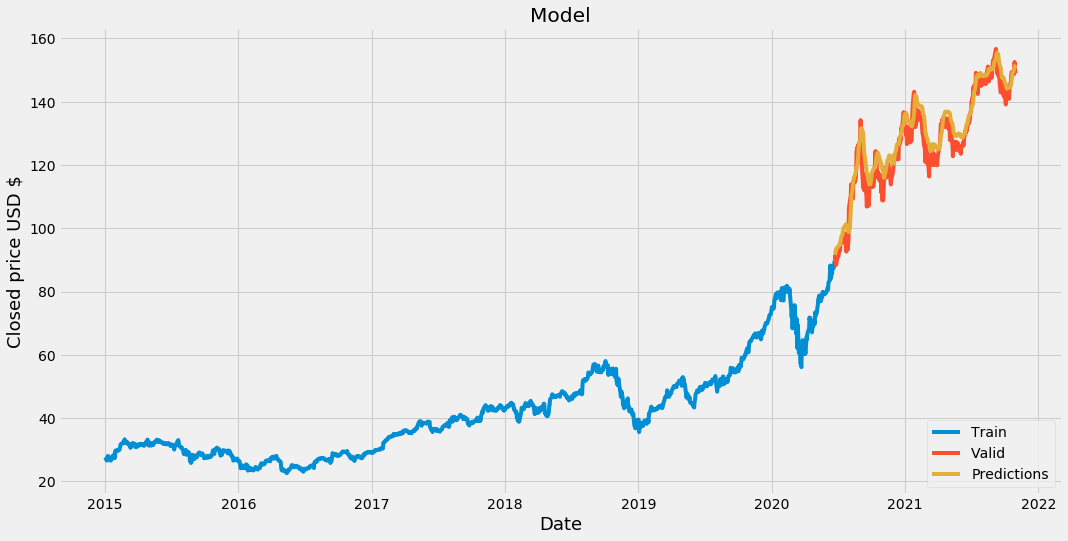

In [21]:
# Plotting the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid' , 'Predictions'], loc = 'lower right')
plt.show()

## Comaparing data

In [22]:
# Showing the value of actual price as well as the predicted

valid

,Close,Predictions
Date,,
2020-06-23,91.632500,91.546593
2020-06-24,90.014999,92.337723
2020-06-25,91.209999,92.949158
2020-06-26,88.407501,93.556229
2020-06-29,90.445000,93.727623
...,...,...
2021-10-26,149.320007,150.133865
2021-10-27,148.850006,150.520203
2021-10-28,152.570007,150.725815


## Obtaining result

In [23]:
# Getting the quote and predicting for the next day

C_quote = web.DataReader(C_name, data_source='yahoo', start='2015-01-01', end= enddate)

# Create a new dataframe
new_df = C_quote.filter(['Close'])

# Taking last 60 days data and converting into array
last_60_days = new_df[-60:].values

# Scale the data b/w 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append last 60 days data
X_test.append(last_60_days_scaled)

# Converting into array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[151.57503]]


## Checking result - (CAN BE TREATED AS COMMENT)

In [25]:
# Getting the quote and predicting for the next day - ACTUAL 

C_quoteR = web.DataReader(C_name, data_source='yahoo', start='2021-11-02', end='2021-11-02')
print(C_quoteR['Close'])

Date
2021-11-01    148.960007
2021-11-02    150.755005
Name: Close, dtype: float64
